In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
hotel = pd.read_csv('/Users/katiexn/Downloads/Dataset/hotel_bookings.csv')

In [3]:
hotel.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
hotel.shape

(119390, 32)

In [5]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
hotel = hotel.drop('company',axis=1)

In [8]:
hotel = hotel.dropna(subset=['children'])
hotel = hotel.dropna(subset=['agent'])

In [9]:
hotel['country'].value_counts()

PRT    37591
GBR    10889
FRA     9810
ESP     7848
DEU     6998
       ...  
BWA        1
CYM        1
VGB        1
FJI        1
ATF        1
Name: country, Length: 174, dtype: int64

In [10]:
hotel['country'].fillna('other country', inplace = True)

In [11]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Text(0, 0.5, 'Count')

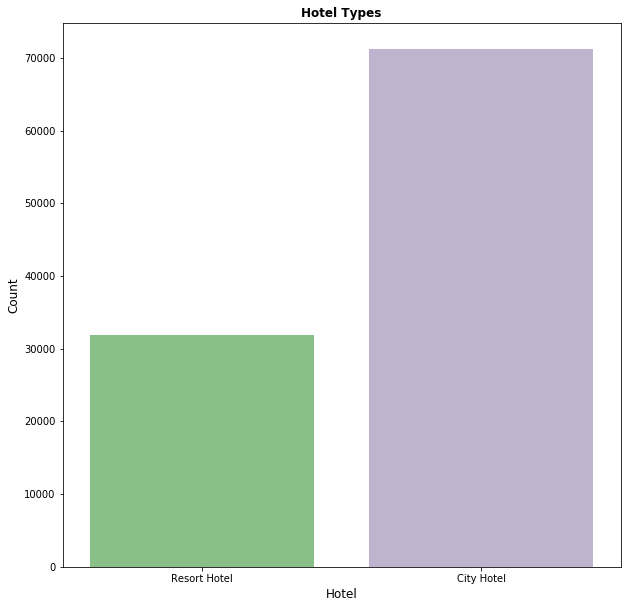

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = hotel, palette='Accent')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

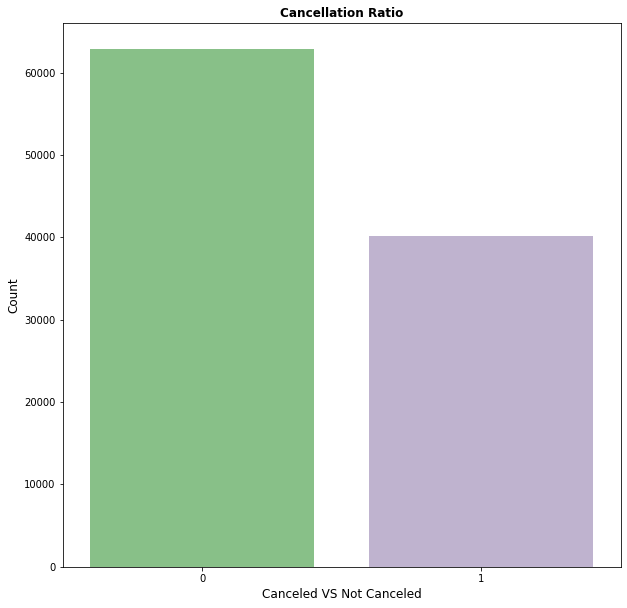

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(x='is_canceled', data = hotel, palette='Accent')
plt.title('Cancellation Ratio', weight='bold')
plt.xlabel('Canceled VS Not Canceled', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

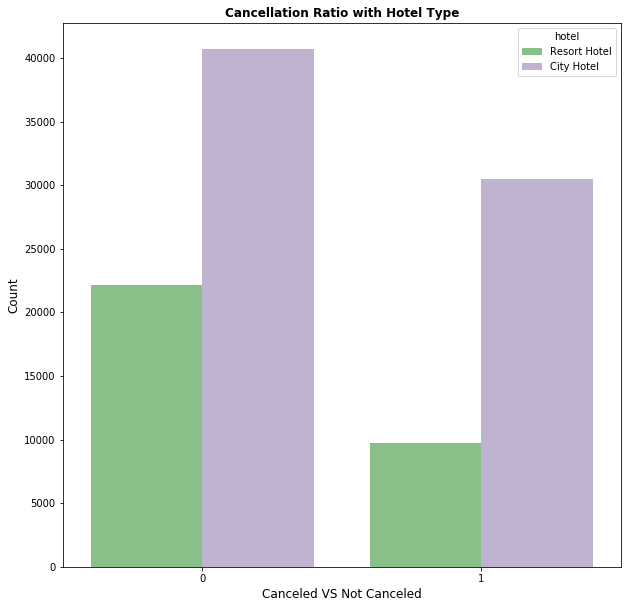

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x='is_canceled',hue='hotel', data = hotel, palette='Accent')
plt.title('Cancellation Ratio with Hotel Type', weight='bold')
plt.xlabel('Canceled VS Not Canceled', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [15]:
hotel['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)

Text(0, 0.5, 'Count')

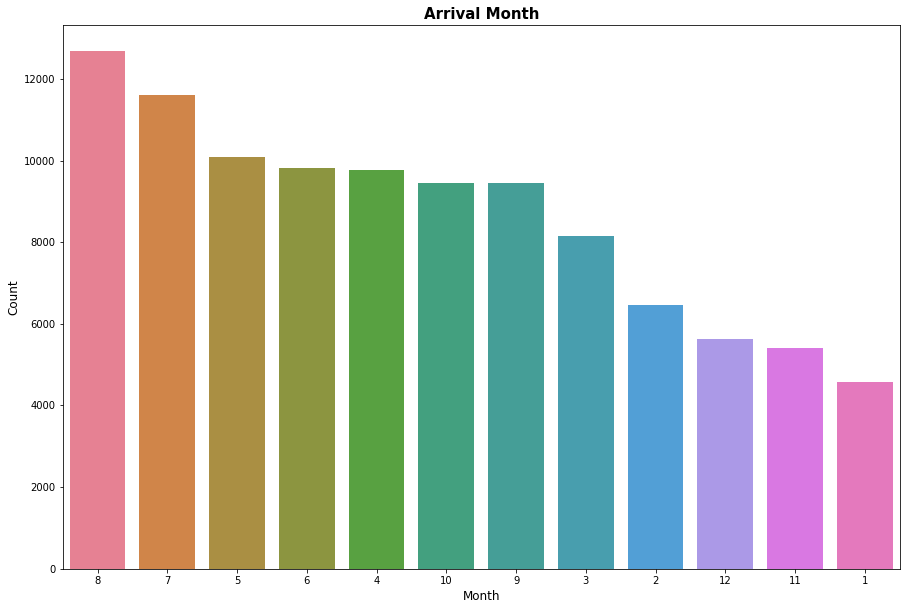

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = hotel,order= pd.value_counts(hotel['arrival_date_month']).index,palette='husl')
plt.title('Arrival Month', weight='bold',fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
                                                                

Text(0, 0.5, 'Count')

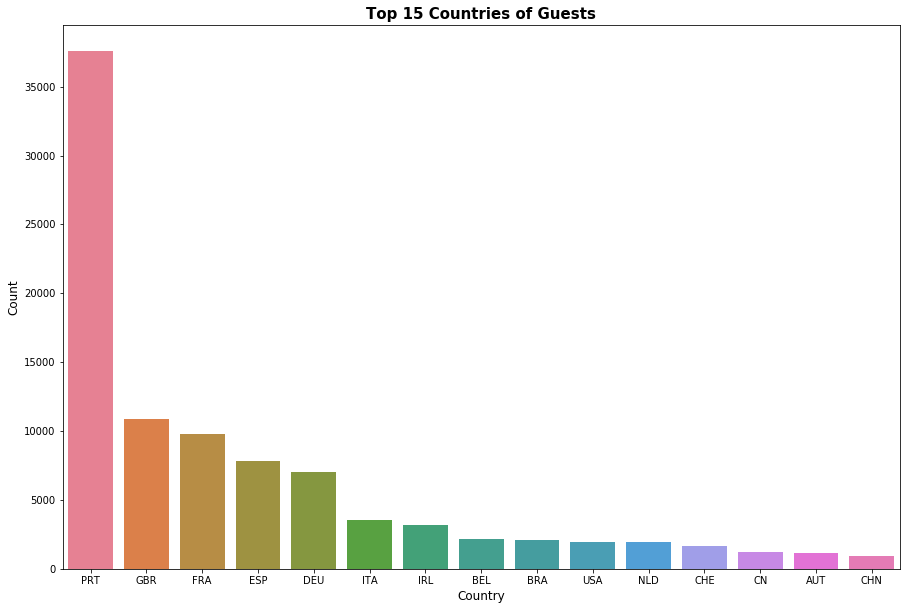

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x='country', data = hotel,order= pd.value_counts(hotel['country']).iloc[:15].index,palette='husl')
plt.title('Top 15 Countries of Guests', weight='bold', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

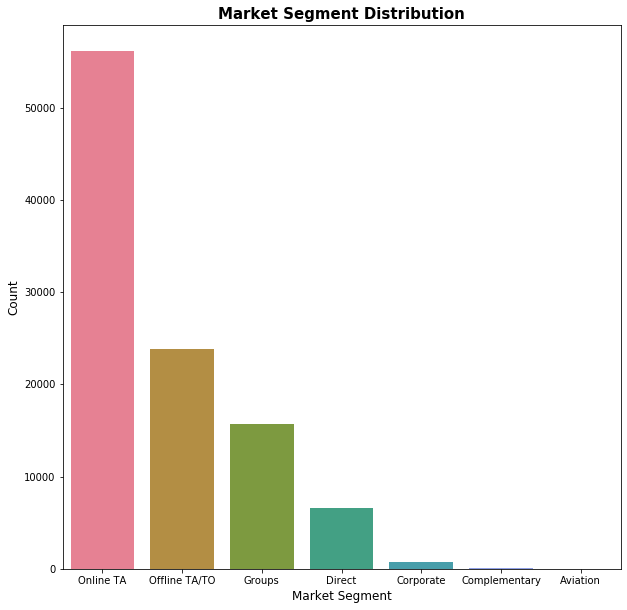

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x='market_segment', data = hotel,order= pd.value_counts(hotel['market_segment']).index,palette='husl')
plt.title('Market Segment Distribution', weight='bold',fontsize=15)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
                                 

Text(0, 0.5, 'Count')

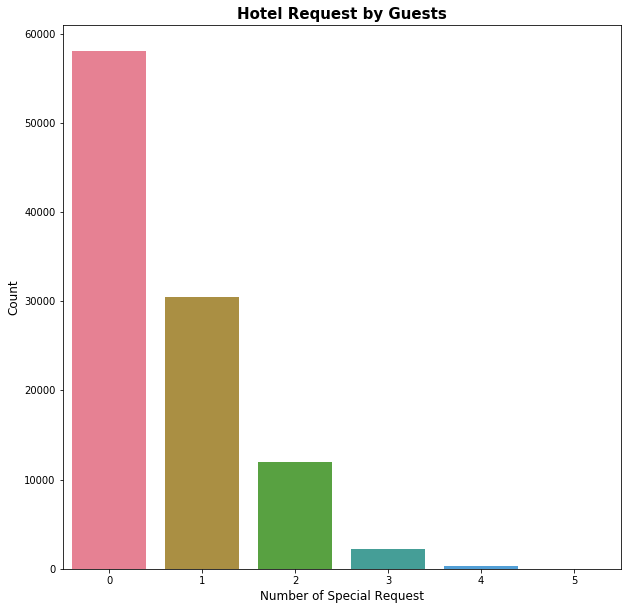

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(x='total_of_special_requests', data = hotel,order= pd.value_counts(hotel['total_of_special_requests']).index,palette='husl')
plt.title('Hotel Request by Guests', weight='bold',fontsize=15)
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

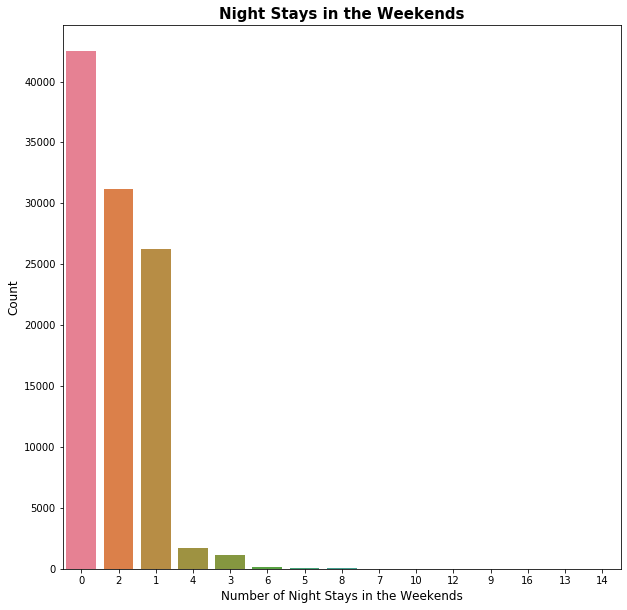

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x='stays_in_weekend_nights', data = hotel,order= pd.value_counts(hotel['stays_in_weekend_nights']).index,palette='husl')
plt.title('Night Stays in the Weekends', weight='bold',fontsize=15)
plt.xlabel('Number of Night Stays in the Weekends', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

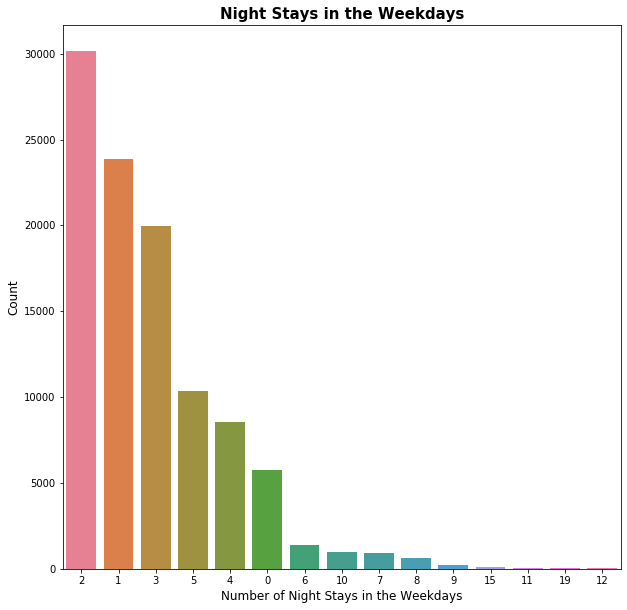

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x='stays_in_week_nights', data = hotel,order= pd.value_counts(hotel['stays_in_week_nights']).iloc[:15].index,palette='husl')
plt.title('Night Stays in the Weekdays', weight='bold',fontsize=15)
plt.xlabel('Number of Night Stays in the Weekdays', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [22]:
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [23]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [24]:
hotel_corr = hotel.copy()

In [25]:
le = LabelEncoder()

In [26]:
hotel_corr['meal'] = le.fit_transform(hotel_corr['meal'])
hotel_corr['hotel'] = le.fit_transform(hotel_corr['hotel'])
hotel_corr['country'] = le.fit_transform(hotel_corr['country'])
hotel_corr['arrival_date_month'] = le.fit_transform(hotel_corr['arrival_date_month'])
hotel_corr['is_repeated_guest'] = le.fit_transform(hotel_corr['is_repeated_guest'])
hotel_corr['deposit_type'] = le.fit_transform(hotel_corr['deposit_type'])
hotel_corr['distribution_channel'] = le.fit_transform(hotel_corr['distribution_channel'])
hotel_corr['reserved_room_type'] = le.fit_transform(hotel_corr['reserved_room_type'])
hotel_corr['assigned_room_type'] = le.fit_transform(hotel_corr['assigned_room_type'])
hotel_corr['agent'] = le.fit_transform(hotel_corr['agent'])
hotel_corr['customer_type'] = le.fit_transform(hotel_corr['customer_type'])
hotel_corr['reservation_status'] = le.fit_transform(hotel_corr['reservation_status'])
hotel_corr['reservation_status_date'] = le.fit_transform(hotel_corr['reservation_status_date'])
hotel_corr['market_segment'] = le.fit_transform(hotel_corr['market_segment'])

In [27]:
hotel_data_categorical = hotel_corr[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status','reservation_status_date']]
hotel_data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103048 entries, 3 to 119389
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   hotel                    103048 non-null  int64
 1   is_canceled              103048 non-null  int64
 2   arrival_date_month       103048 non-null  int64
 3   meal                     103048 non-null  int64
 4   country                  103048 non-null  int64
 5   market_segment           103048 non-null  int64
 6   distribution_channel     103048 non-null  int64
 7   is_repeated_guest        103048 non-null  int64
 8   reserved_room_type       103048 non-null  int64
 9   assigned_room_type       103048 non-null  int64
 10  deposit_type             103048 non-null  int64
 11  agent                    103048 non-null  int64
 12  customer_type            103048 non-null  int64
 13  reservation_status       103048 non-null  int64
 14  reservation_status_date  103048 non-

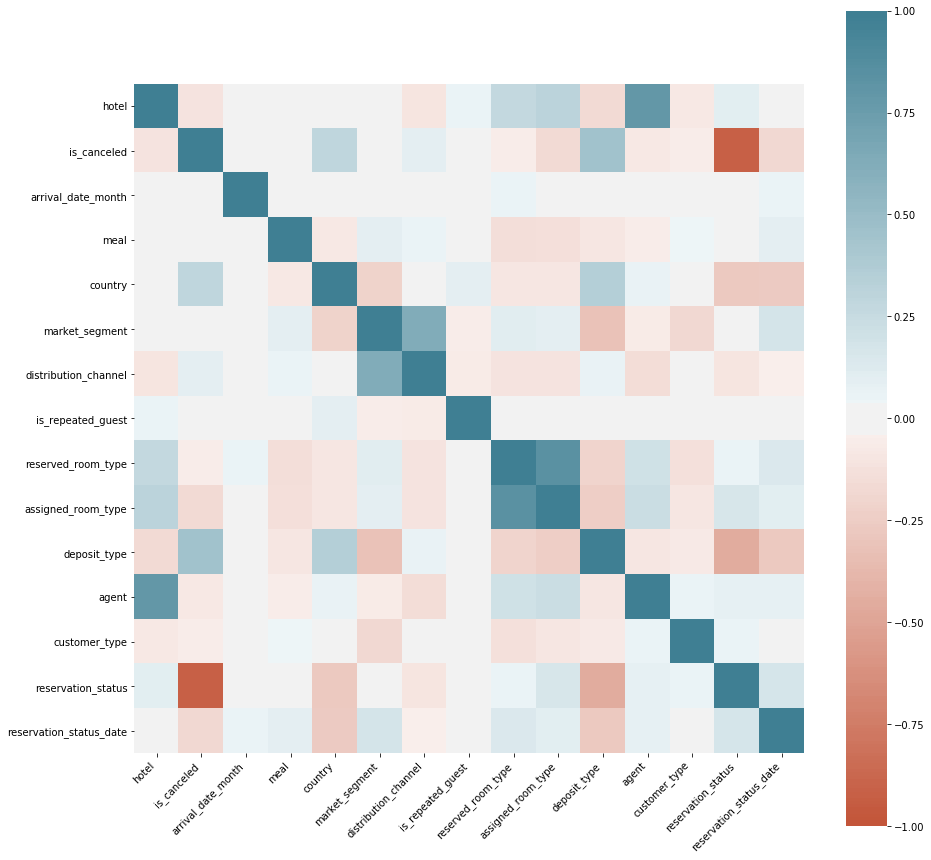

In [28]:
plt.figure(figsize=(15,15))
corr_categorical=hotel_data_categorical.corr()
ax1 = sns.heatmap(
    corr_categorical, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [29]:
hotel_data_numerical = hotel_corr.drop(['hotel','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status','reservation_status_date'],axis=1)
hotel_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103048 entries, 3 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     103048 non-null  int64  
 1   lead_time                       103048 non-null  int64  
 2   arrival_date_year               103048 non-null  int64  
 3   arrival_date_week_number        103048 non-null  int64  
 4   arrival_date_day_of_month       103048 non-null  int64  
 5   stays_in_weekend_nights         103048 non-null  int64  
 6   stays_in_week_nights            103048 non-null  int64  
 7   adults                          103048 non-null  int64  
 8   children                        103048 non-null  float64
 9   babies                          103048 non-null  int64  
 10  previous_cancellations          103048 non-null  int64  
 11  previous_bookings_not_canceled  103048 non-null  int64  
 12  booking_changes 

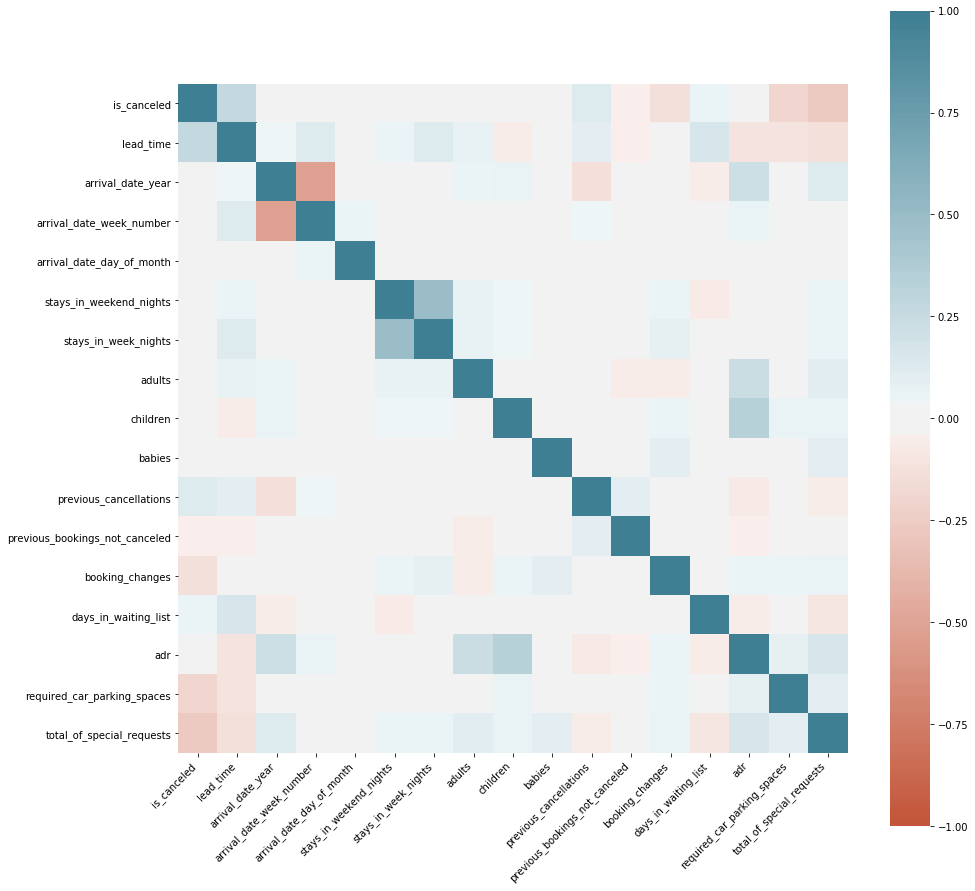

In [30]:
plt.figure(figsize=(15,15))
corr_numerical=hotel_data_numerical.corr()
ax2 = sns.heatmap(
    corr_numerical, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax2.set_xticklabels(
    ax2.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [31]:
hotel_corr = hotel_corr.drop('reservation_status',axis=1)

In [34]:
y = hotel_corr['is_canceled']
x = hotel_corr.drop(['is_canceled'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [45]:
def hotel_model(algorithm,x_train, x_test, y_train, y_test):
    algo = algorithm
    algo_model = algo.fit(x_train, y_train)
    global y_prob, y_pred
    y_prob = algo.predict_proba(x_test)[:,1]
    y_pred = algo_model.predict(x_test)
    
    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {} '
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred),roc_auc_score(y_test,y_pred)))

In [47]:
hotel_model(LogisticRegression(solver = 'liblinear'),x_train, x_test, y_train, y_test)

Accuracy Score: 0.7907164806728125

Confusion Matrix:
 [[17105  1707]
 [ 4763  7340]]

AUC Score: 0.7578606273718097 


In [49]:
hotel_model(DecisionTreeClassifier(max_depth = 12), x_train, x_test, y_train, y_test)

Accuracy Score: 0.8753355976063399

Confusion Matrix:
 [[17278  1534]
 [ 2320  9783]]

AUC Score: 0.8633841466248071 


In [50]:
hotel_model(RandomForestClassifier(), x_train, x_test, y_train, y_test)

Accuracy Score: 0.9456251010836164

Confusion Matrix:
 [[18378   434]
 [ 1247 10856]]

AUC Score: 0.9369486566760263 


In [51]:
hotel_model(GaussianNB(), x_train, x_test, y_train, y_test)

Accuracy Score: 0.5682354843926897

Confusion Matrix:
 [[ 6804 12008]
 [ 1340 10763]]

AUC Score: 0.6254838400757099 
